# 2BR4_rna_brainspan_enrichment

2/16/2021
can use smartseq
make a gene tissue gmt

In [2]:
library(tidyverse)
# library(readr)
library(ggplot2)
library(clusterProfiler)
library(org.Hs.eg.db)
library(pheatmap)
library(caret)  
library(ReactomePA)
library(annotate)
library(seqinr)

In [3]:
save_path = '/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/scrna_enrichment/'

In [4]:
path_genes = '/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/D_mpraanalyze_barcode_allelic//egene_gtex/'
diseases = sort(c('schizo','depress_updatedhoward','bipolar','anxiety','attent','personality','panic','traum','autism','ocd'))
diseases_all = c(diseases, 'all')
get_genes = function(dz){
    file = str_c(path_genes,dz,'.txt')
    genes = read.table(file,header=F,stringsAsFactor=F)$V1
    print(dz)
    print(length(genes))
    return(genes)
}

get_entrez = function(genes){
    entrez_ids = bitr(genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
#     print(length(entrez_ids))
    return(entrez_ids)
#     return(bitr(genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db"))
}

enrichr_res = function(entrez_genes, c_gmt){
    enrichr_res <- enricher(entrez_genes, TERM2GENE=c_gmt,                                            
                                            minGSSize=0,
                                            maxGSSize=1000,                                                
                                            pAdjustMethod = "fdr",
                                            qvalueCutoff = 1,
                                            pvalueCutoff = 1)
    
    if (!is.null(enrichr_res)){
        enrichr_res <- setReadable(enrichr_res, OrgDb=org.Hs.eg.db, keyType="ENTREZID")
        return(data.frame(enrichr_res))}
    return(data.frame())
}

filt_res = function(df){
    return(filter(df,p.adjust<0.05))
}

get_lengths = function(list_dfs){
    for (name in names(list_dfs)){
        print(name)
        if (is.data.frame(list_dfs[[name]])){
            print(dim(list_dfs[[name]])[1])
        }
        else{
            print(length(list_dfs[[name]]))
        }
    }
}

save_dfs = function(list_dfs, save_prefix){
    for (name in names(list_dfs)){
        if (dim(list_dfs[[name]])[1]>0){
            save_filepath = paste0(save_prefix, '_', name,'.csv')
            write.csv(list_dfs[[name]], save_filepath)            
        }

    }
}

                            
# get list of unique genes in list of lists
get_genes_unique = function(list_dfs){
    genelist = sort(unique(do.call('c',lapply(do.call('rbind',list_dfs)$geneID, function(x) strsplit(x,'/')[[1]]))))
    return(genelist)
}
run_enrichment = function(entrez_list, c_gmt, save_prefix){
    enrich_df_list =  sapply(entrez_list, function(x) enrichr_res(x,c_gmt))
    save_dfs(enrich_df_list, save_prefix)
    enrich_df_list_filt = sapply(enrich_df_list, filt_res)
    get_lengths(enrich_df_list_filt)
    print('getting unique genes --all')
    print(get_genes_unique (enrich_df_list)                        )
    print('getting unique genes --pval filt')
    print(get_genes_unique (enrich_df_list_filt)   )
    return(enrich_df_list_filt)
}
 
# rna_df is samples x genes and removed low variances genes
remove_lowvar_genes = function(rna_df){
    nzv_cols <- nearZeroVar(rna_df)
    print(dim(rna_df))
    if(length(nzv_cols) > 0) rna_df <- rna_df[, -nzv_cols]
    print(dim(rna_df))
    return(rna_df)

}

save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}



# get_expr

In [5]:
file = '/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/D_mpraanalyze_barcode_allelic/interesting_egenes.csv'
interesting_egenes = read.csv(file,header=F,stringsAsFactor=F)$V1
# interesting_egenes

In [6]:
file = '/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/D_mpraanalyze_barcode_allelic/interesting_egenes.csv'
interesting_egenes = read.csv(file,header=F,stringsAsFactor=F)$V1
# interesting_egenes

In [7]:
dz_genes = sapply(diseases_all, get_genes)

[1] "anxiety"
[1] 18
[1] "attent"
[1] 46
[1] "autism"
[1] 1
[1] "bipolar"
[1] 129
[1] "depress_updatedhoward"
[1] 101
[1] "ocd"
[1] 20
[1] "panic"
[1] 4
[1] "personality"
[1] 12
[1] "schizo"
[1] 308
[1] "traum"
[1] 5
[1] "all"
[1] 429


In [8]:
dz_gene_list_entrez = sapply(dz_genes,get_entrez)
get_lengths(dz_gene_list_entrez)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
“4.35% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
“3.88% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
“0.99% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
“5% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 m

[1] "anxiety"
[1] 18
[1] "attent"
[1] 44
[1] "autism"
[1] 1
[1] "bipolar"
[1] 124
[1] "depress_updatedhoward"
[1] 100
[1] "ocd"
[1] 19
[1] "panic"
[1] 4
[1] "personality"
[1] 12
[1] "schizo"
[1] 296
[1] "traum"
[1] 5
[1] "all"
[1] 415


In [10]:
# get entrez
length(dz_genes$all)
all_sym_to_entrez = bitr(dz_genes$all, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")#$ENTREZID
str(all_sym_to_entrez)

[1] 429

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(dz_genes$all, fromType = "SYMBOL", toType = "ENTREZID", :
“3.26% of input gene IDs are fail to map...”


'data.frame':	415 obs. of  2 variables:
 $ SYMBOL  : chr  "AADAT" "ABCB9" "ABCC8" "ABHD16A" ...
 $ ENTREZID: chr  "51166" "23457" "6833" "7920" ...



# create geneset (gmt dataframe) with geneset - gene long version genes in entrez

In [11]:
metadata_df = read.csv('../data/external/brainmap_cortex_smartseq/metadata.csv')
head(metadata_df)

sample_name         exp_component_name  specimen_type cluster_color
1 F2S4_160113_027_A01 LS-15005h_S01_E1-50 nucleus                    
2 F2S4_160113_027_B01 LS-15005h_S02_E1-50 nucleus       #E170FE      
3 F2S4_160113_027_C01 LS-15005h_S03_E1-50 nucleus       #8E5864      
4 F2S4_160113_027_D01 LS-15005h_S04_E1-50 nucleus       #8B5862      
5 F2S4_160113_027_E01 LS-15005h_S05_E1-50 nucleus       #CF6EC9      
6 F2S4_160113_027_F01 LS-15005h_S06_E1-50 nucleus       #E693CE      
  cluster_order cluster_label         class_color class_order class_label
1 NA                                              NA                     
2 32            Inh L2-5 VIP TOX2     #0066FF      4          GABAergic  
3  2            Inh L1 LAMP5 GGT8P    #0066FF      4          GABAergic  
4  1            Inh L1 LAMP5 NDNF     #0066FF      4          GABAergic  
5 34            Inh L1-3 VIP ZNF322P1 #0066FF      4          GABAergic  
6 35            Inh L3 VIP CBLN1      #0066FF      4          GABAergic  
  subclass_color ⋯ cell_type_alt_alias_order cell_type_alt_alias_label
1                ⋯ NA                                                 
2 #996517        ⋯ 32                                                 
3 #FF7373        ⋯  2                                                 
4 #FF7373        ⋯  1                                                 
5 #996517        ⋯ 34                                                 
6 #996517        ⋯ 35                                                 
  cell_type_designation_color cell_type_designation_order
1                             NA                         
2 #E170FE                     32                         
3 #8E5864                      2                         
4 #8B5862                      1                         
5 #CF6EC9                     34                         
6 #E693CE                     35                         
  cell_type_designation_label external_donor_name_color
1                             #3DCC3D                  
2 Neuron 032                  #3DCC3D                  
3 Neuron 002                  #3DCC3D                  
4 Neuron 001                  #3DCC3D                  
5 Neuron 034                  #3DCC3D                  
6 Neuron 035                  #3DCC3D                  
  external_donor_name_order external_donor_name_label outlier_call
1 2                         H200.1025                 True        
2 2                         H200.1025                 False       
3 2                         H200.1025                 False       
4 2                         H200.1025                 False       
5 2                         H200.1025                 False       
6 2                         H200.1025                 False       
  outlier_type            
1 Outlier L1-3 SST OR2AD1P
2                         
3                         
4                         
5                         
6

In [12]:
## efforts to try to annotate with cortical layer and region label, might need another heatmap?? (toDO later)

metadata_df%>%
    dplyr::select(cluster_label, class_label,subclass_label,region_label,cortical_layer_label)%>%
    mutate(cluster_id = str_replace_all(cluster_label, "[ .-]", "."))%>%
    filter(cluster_label!='')%>%
    distinct()%>%
    group_by(cluster_id, class_label, region_label)%>%#,cortical_layer_label)%>%
    tally()

cluster_id              class_label  region_label n
1   Astro.L1.6.FGFR3.ETNPPL Non-neuronal A1C          8
2   Astro.L1.6.FGFR3.ETNPPL Non-neuronal CgG          5
3   Astro.L1.6.FGFR3.ETNPPL Non-neuronal M1lm         5
4   Astro.L1.6.FGFR3.ETNPPL Non-neuronal M1ul         5
5   Astro.L1.6.FGFR3.ETNPPL Non-neuronal MTG          6
6   Astro.L1.6.FGFR3.ETNPPL Non-neuronal S1lm         7
7   Astro.L1.6.FGFR3.ETNPPL Non-neuronal S1ul         7
8   Astro.L1.6.FGFR3.ETNPPL Non-neuronal V1C          8
9   Astro.L1.FGFR3.FOS      Non-neuronal A1C          3
10  Astro.L1.FGFR3.FOS      Non-neuronal CgG          3
11  Astro.L1.FGFR3.FOS      Non-neuronal M1lm         2
12  Astro.L1.FGFR3.FOS      Non-neuronal M1ul         2
13  Astro.L1.FGFR3.FOS      Non-neuronal MTG          4
14  Astro.L1.FGFR3.FOS      Non-neuronal S1lm         2
15  Astro.L1.FGFR3.FOS      Non-neuronal S1ul         2
16  Astro.L1.FGFR3.FOS      Non-neuronal V1C          2
17  Astro.L1.FGFR3.MT1G     Non-neuronal A1C          5
18  Astro.L1.FGFR3.MT1G     Non-neuronal CgG          3
19  Astro.L1.FGFR3.MT1G     Non-neuronal M1lm         3
20  Astro.L1.FGFR3.MT1G     Non-neuronal M1ul         3
21  Astro.L1.FGFR3.MT1G     Non-neuronal MTG          3
22  Astro.L1.FGFR3.MT1G     Non-neuronal S1lm         2
23  Astro.L1.FGFR3.MT1G     Non-neuronal S1ul         2
24  Astro.L1.FGFR3.MT1G     Non-neuronal V1C          4
25  Endo.L2.5.CLDN5         Non-neuronal A1C          4
26  Endo.L2.5.CLDN5         Non-neuronal CgG          4
27  Endo.L2.5.CLDN5         Non-neuronal M1lm         3
28  Endo.L2.5.CLDN5         Non-neuronal M1ul         2
29  Endo.L2.5.CLDN5         Non-neuronal MTG          5
30  Endo.L2.5.CLDN5         Non-neuronal S1lm         2
⋮   ⋮                       ⋮            ⋮            ⋮
805 Oligo.L4.6.OPALIN       Non-neuronal A1C          8
806 Oligo.L4.6.OPALIN       Non-neuronal CgG          5
807 Oligo.L4.6.OPALIN       Non-neuronal M1lm         4
808 Oligo.L4.6.OPALIN       Non-neuronal M1ul         5
809 Oligo.L4.6.OPALIN       Non-neuronal MTG          6
810 Oligo.L4.6.OPALIN       Non-neuronal S1lm         6
811 Oligo.L4.6.OPALIN       Non-neuronal S1ul         7
812 Oligo.L4.6.OPALIN       Non-neuronal V1C          8
813 OPC.L1.6.MYT1           Non-neuronal A1C          8
814 OPC.L1.6.MYT1           Non-neuronal CgG          5
815 OPC.L1.6.MYT1           Non-neuronal M1lm         5
816 OPC.L1.6.MYT1           Non-neuronal M1ul         5
817 OPC.L1.6.MYT1           Non-neuronal MTG          6
818 OPC.L1.6.MYT1           Non-neuronal S1lm         7
819 OPC.L1.6.MYT1           Non-neuronal S1ul         7
820 OPC.L1.6.MYT1           Non-neuronal V1C          8
821 Peri.L1.6.MUSTN1        Non-neuronal A1C          2
822 Peri.L1.6.MUSTN1        Non-neuronal CgG          2
823 Peri.L1.6.MUSTN1        Non-neuronal M1lm         2
824 Peri.L1.6.MUSTN1        Non-neuronal M1ul         1
825 Peri.L1.6.MUSTN1        Non-neuronal MTG          6
826 Peri.L1.6.MUSTN1        Non-neuronal S1lm         1
827 Peri.L1.6.MUSTN1        Non-neuronal S1ul         3
828 Peri.L1.6.MUSTN1        Non-neuronal V1C          3
829 VLMC.L1.3.CYP1B1        Non-neuronal A1C          1
830 VLMC.L1.3.CYP1B1        Non-neuronal CgG          2
831 VLMC.L1.3.CYP1B1        Non-neuronal M1lm         1
832 VLMC.L1.3.CYP1B1        Non-neuronal MTG          2
833 VLMC.L1.3.CYP1B1        Non-neuronal S1ul         1
834 VLMC.L1.3.CYP1B1        Non-neuronal V1C          1

In [13]:
# brainmap_expr_df_region = read.csv('../data/processed/fig1/rna_10xm1/brainmap_expr_df_region.csv',row.names=1)
brainmap_expr_df_region = read.csv('../data/external/brainmap_cortex_smartseq/medians.csv',row.names=1)%>%dplyr::select(-X)
brainmap_expr_df_region = data.frame(t(brainmap_expr_df_region))

In [14]:
dim(brainmap_expr_df_region)
head(brainmap_expr_df_region[,1:5])


[1]   120 50281

X3.8.1.2 X3.8.1.3 X3.8.1.4 X3.8.1.5 X5.HT3C2
Exc.L5.6.FEZF2.ANKRD20A1   0        0        0        0        0       
Exc.L5.6.THEMIS.TMEM233    0        0        0        0        0       
Inh.L1.LAMP5.NDNF          0        0        0        0        0       
Exc.L6.FEZF2.CPZ           0        0        0        0        0       
Astro.L1.FGFR3.MT1G        0        0        0        0        0       
Exc.L2.3.LINC00507.RPL9P17 0        0        0        0        0

In [15]:
# get entrez
length(dz_genes$all)
all_sym_to_entrez = bitr(dz_genes$all, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")#$ENTREZID
str(all_sym_to_entrez)

[1] 429

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(dz_genes$all, fromType = "SYMBOL", toType = "ENTREZID", :
“3.26% of input gene IDs are fail to map...”


'data.frame':	415 obs. of  2 variables:
 $ SYMBOL  : chr  "AADAT" "ABCB9" "ABCC8" "ABHD16A" ...
 $ ENTREZID: chr  "51166" "23457" "6833" "7920" ...


In [16]:
# egenes expressed in a brain tissue
geneset = dz_genes$all#unique(c(dz_genes$all,interesting_egenes))
region_gene_df = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df)
region_gene_df = region_gene_df[,colSums(region_gene_df)>0]
dim(region_gene_df)
294/416

[1] 120 416

[1] 120 294

[1] 0.7067308

70% of egenes are expressed in at least 1 brain cortex cell type (SMART seq 2018)

[1] 120  90

[1] 120  90
[1] 120  48


[1]  48 120

pdf 
  2

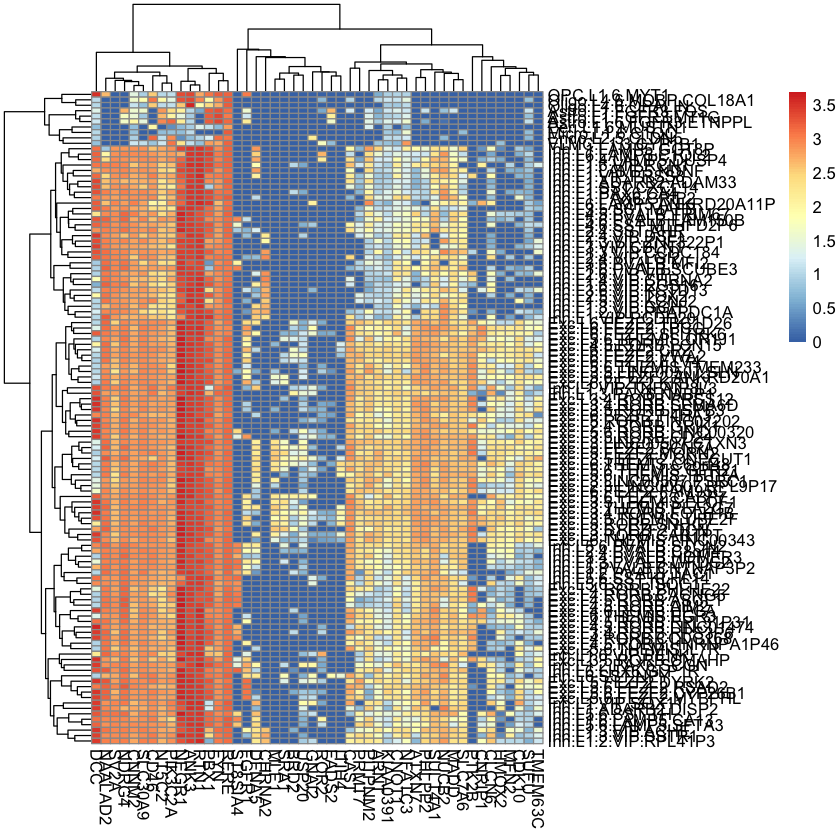

null device 
          1

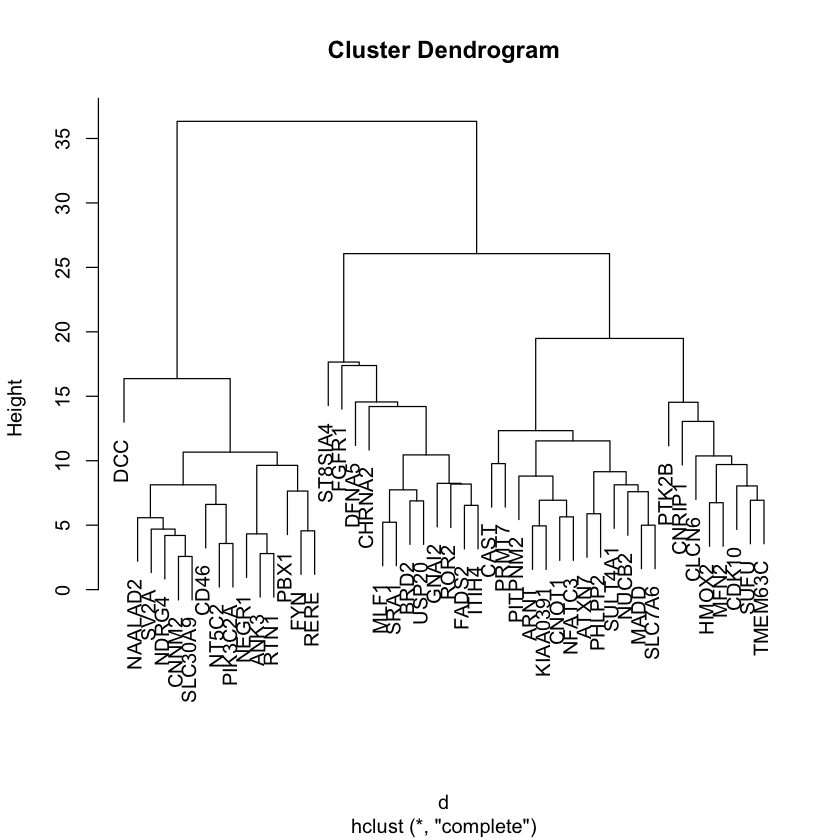

In [25]:
# select egenes from expr df
geneset = intersect(dz_genes$all, interesting_egenes)#unique(c(dz_genes$all,interesting_egenes))
region_gene_df = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df)
# region_gene_df[region_gene_df<=4] = 0
region_gene_df = remove_lowvar_genes(region_gene_df)
region_gene_df_log = log2(t(region_gene_df)+1)
dim(region_gene_df_log)
p = pheatmap(t(region_gene_df_log))
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_all.pdf'),width=11,height=18)
par(bg='white')
plot(p$tree_col)
dev.off()

[1] 120  66

[1]  42 120

pdf 
  2

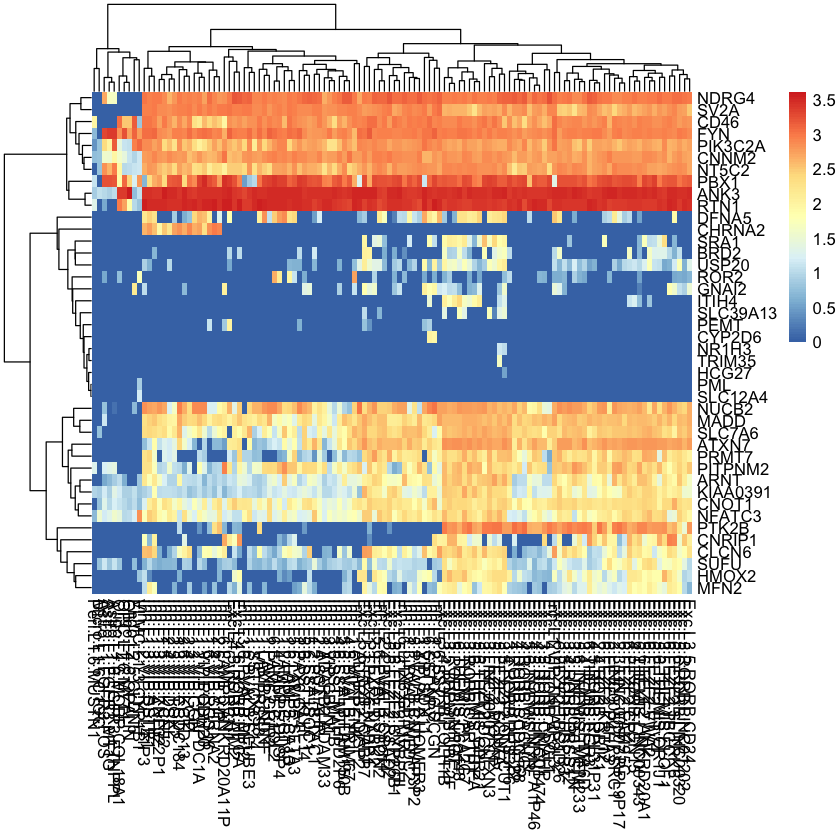

null device 
          1

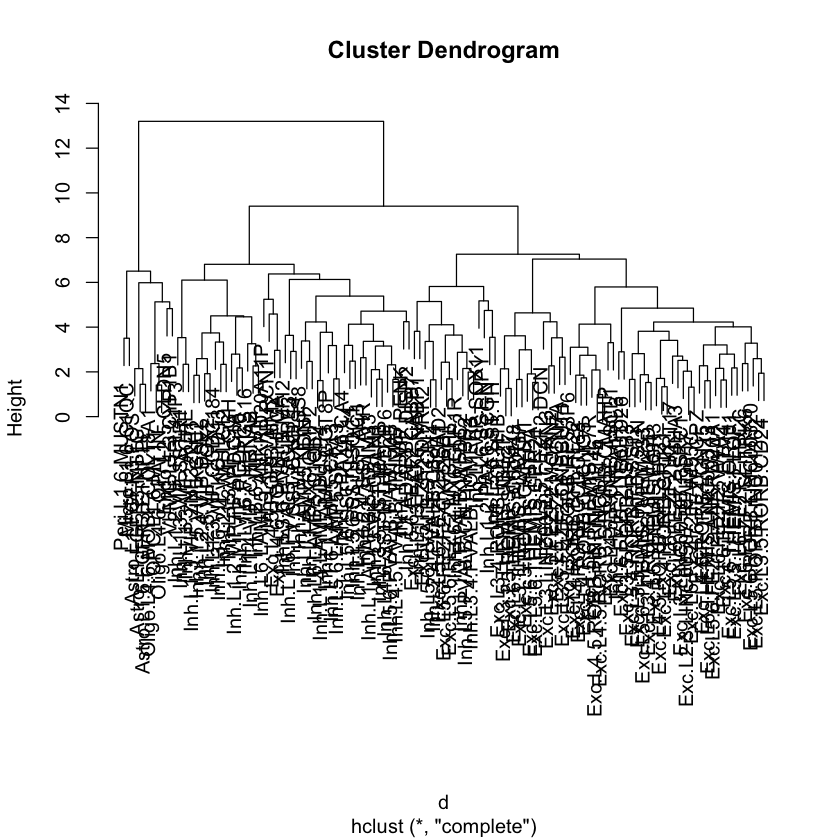

In [21]:
# select egenes from expr df schizo for 
geneset = intersect(dz_genes$schizo, interesting_egenes)#unique(c(dz_genes$schizo,interesting_egenes))
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
# region_gene_df_dz[region_gene_df_dz<=5] = 0
# region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
region_gene_df_dz_log = region_gene_df_dz_log[rowSums(region_gene_df_dz_log)>.1,]
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
dim(region_gene_df_dz_log)
p = pheatmap(region_gene_df_dz_log)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_schizo.pdf'),width=20,height=10)
par(bg='white')
plot(p$tree_col)
dev.off()

[1] 120  28

[1]  17 120

pdf 
  2

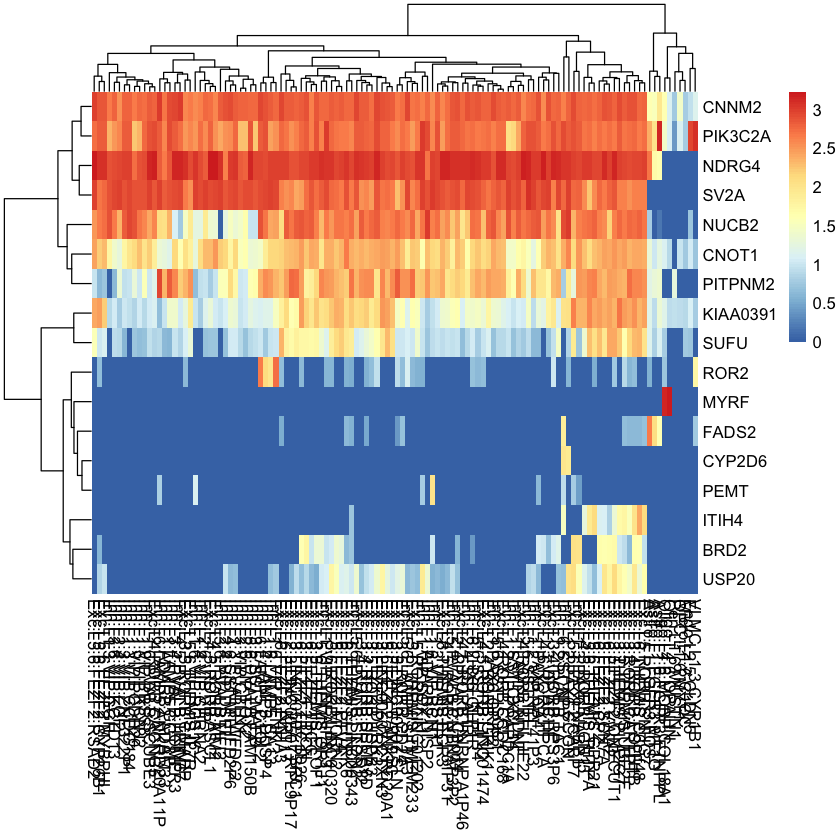

null device 
          1

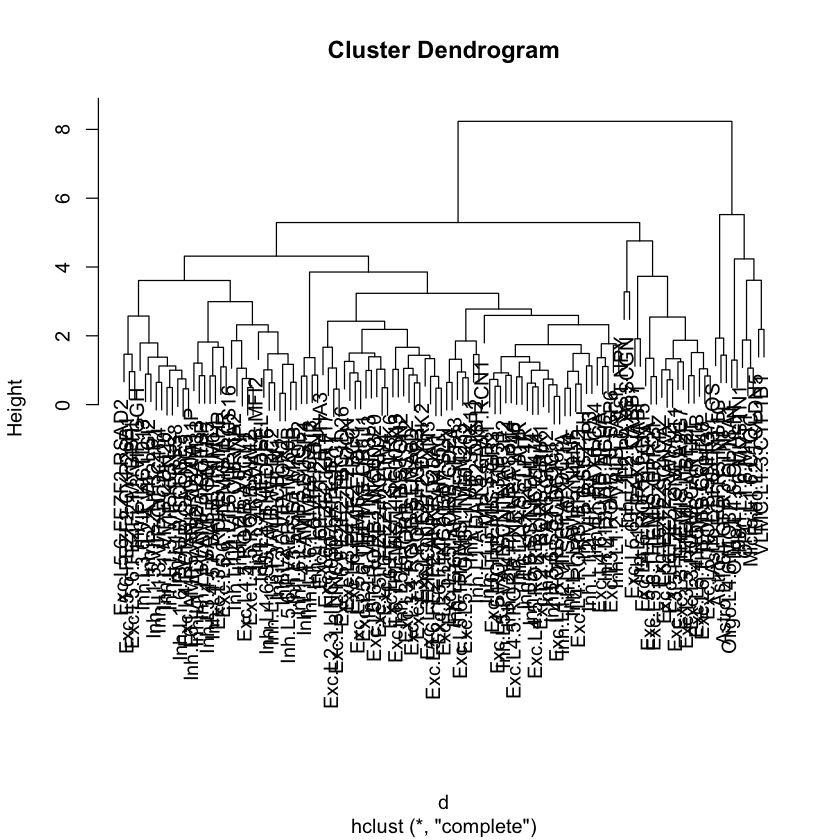

In [22]:
# select egenes from expr df schizo for 
geneset = intersect(dz_genes$bipolar, interesting_egenes)#unique(c(dz_genes$schizo,interesting_egenes))
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
# region_gene_df_dz[region_gene_df_dz<=5] = 0
# region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
region_gene_df_dz_log = region_gene_df_dz_log[rowSums(region_gene_df_dz_log)>.1,]
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
dim(region_gene_df_dz_log)
p = pheatmap(region_gene_df_dz_log)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_bipolar.pdf'),width=20,height=5)
par(bg='white')
plot(p$tree_col)
dev.off()

[1] 120  21

[1]  11 120

pdf 
  2

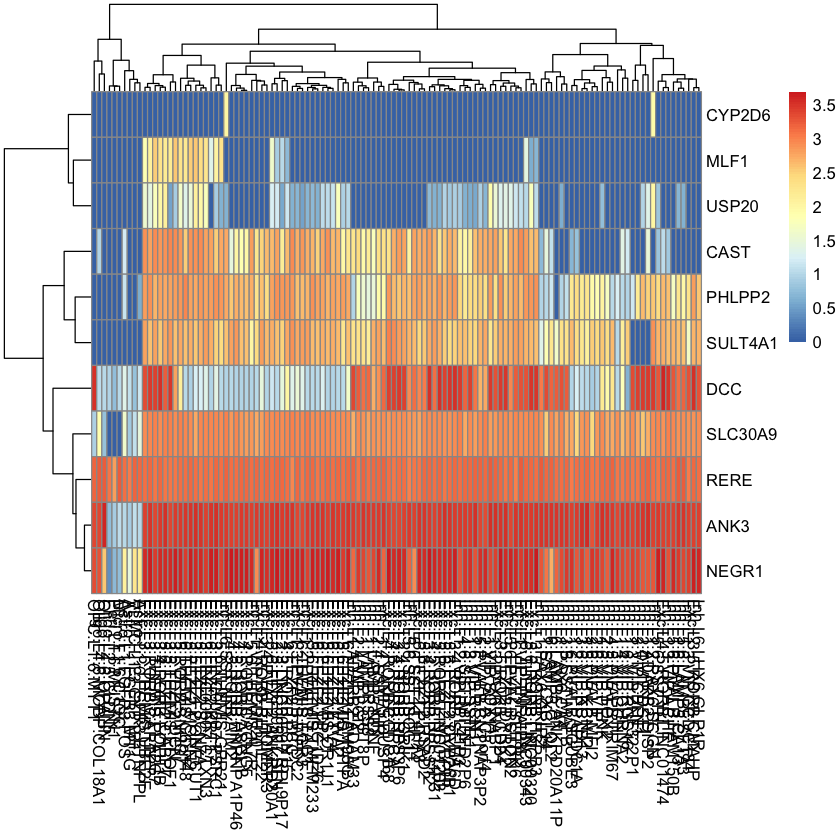

null device 
          1

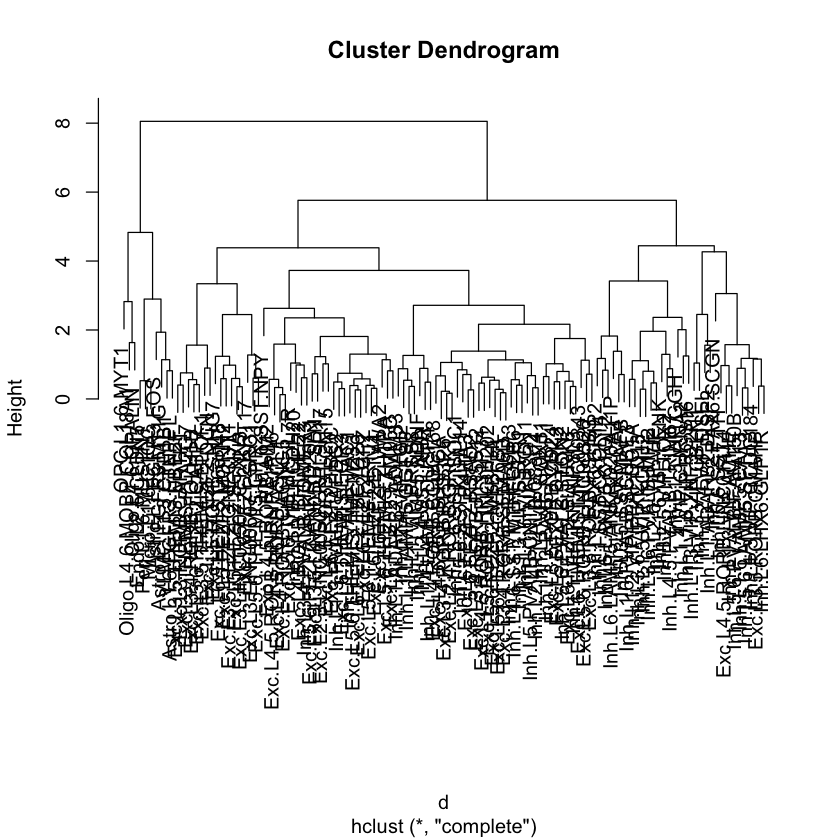

In [23]:
# select egenes from expr df schizo for 
geneset = intersect(dz_genes$depress_updatedhoward, interesting_egenes)#unique(c(dz_genes$schizo,interesting_egenes))
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
# region_gene_df_dz[region_gene_df_dz<=5] = 0
# region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
region_gene_df_dz_log = region_gene_df_dz_log[rowSums(region_gene_df_dz_log)>.1,]
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
dim(region_gene_df_dz_log)
p = pheatmap(region_gene_df_dz_log)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_depress.pdf'),width=20,height=5)
par(bg='white')
plot(p$tree_col)
dev.off()

[1] 120  41

[1]  26 120

pdf 
  2

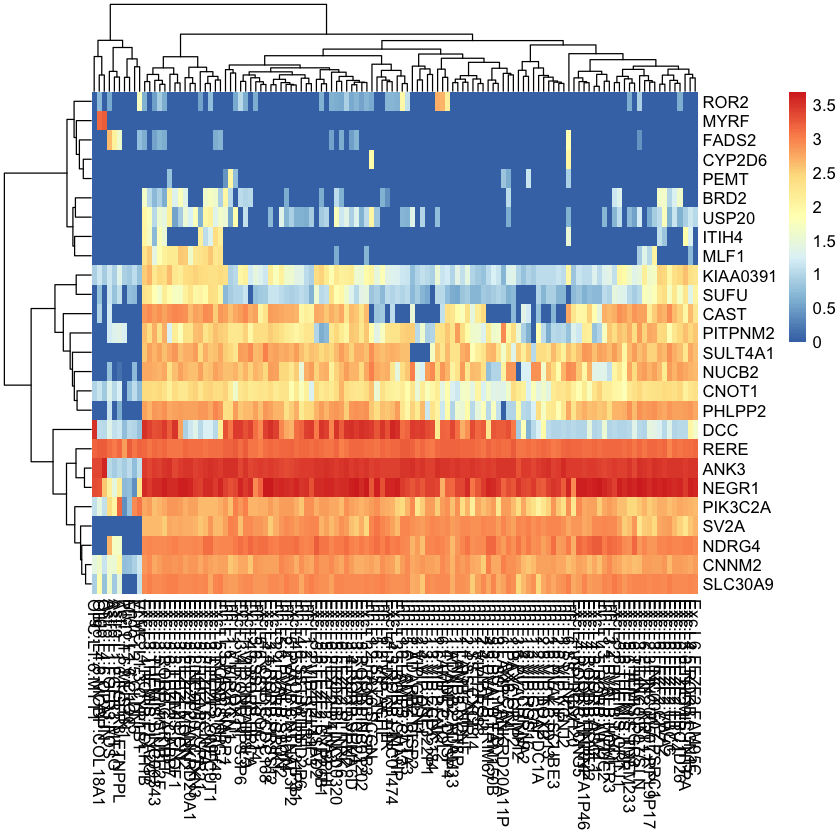

null device 
          1

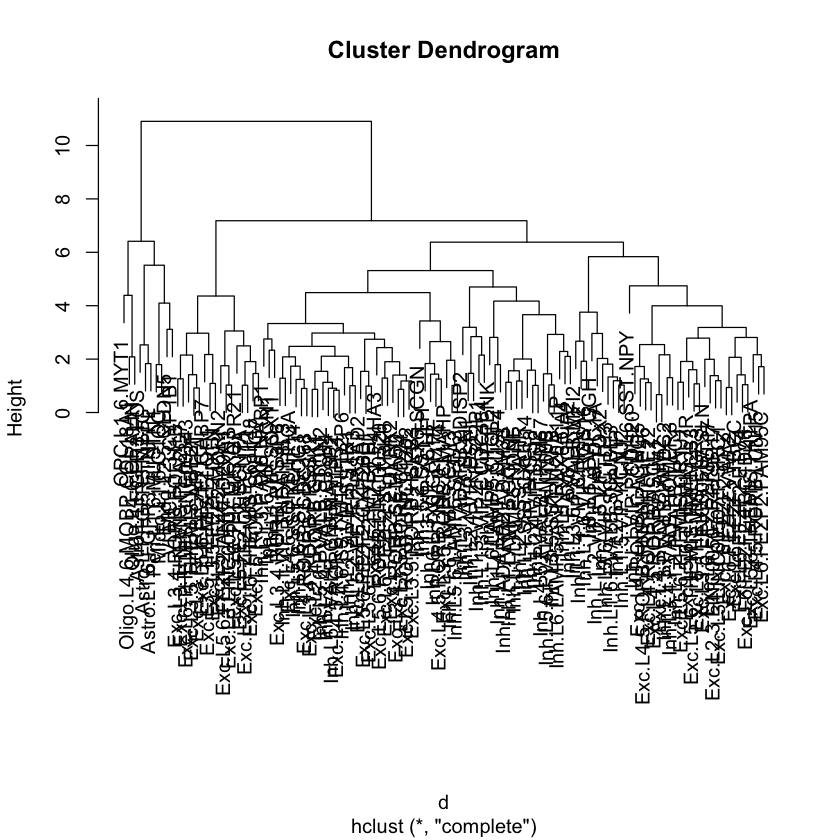

In [25]:
# select egenes from expr df schizo for 
bpd_geneset = intersect(dz_genes$bipolar, interesting_egenes)#unique(c(dz_genes$schizo,interesting_egenes))
mdd_geneset = intersect(dz_genes$depress_updatedhoward, interesting_egenes)#unique(c(dz_genes$schizo,interesting_egenes))
geneset = union(bpd_geneset, mdd_geneset)
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
# region_gene_df_dz[region_gene_df_dz<=5] = 0
# region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
region_gene_df_dz_log = region_gene_df_dz_log[rowSums(region_gene_df_dz_log)>.1,]
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
dim(region_gene_df_dz_log)
p = pheatmap(region_gene_df_dz_log)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_bipolardepress.pdf'),width=20,height=5)
par(bg='white')
plot(p$tree_col)
dev.off()

[1] 120 103

[1] 120 103
[1] 120  55


pdf 
  2

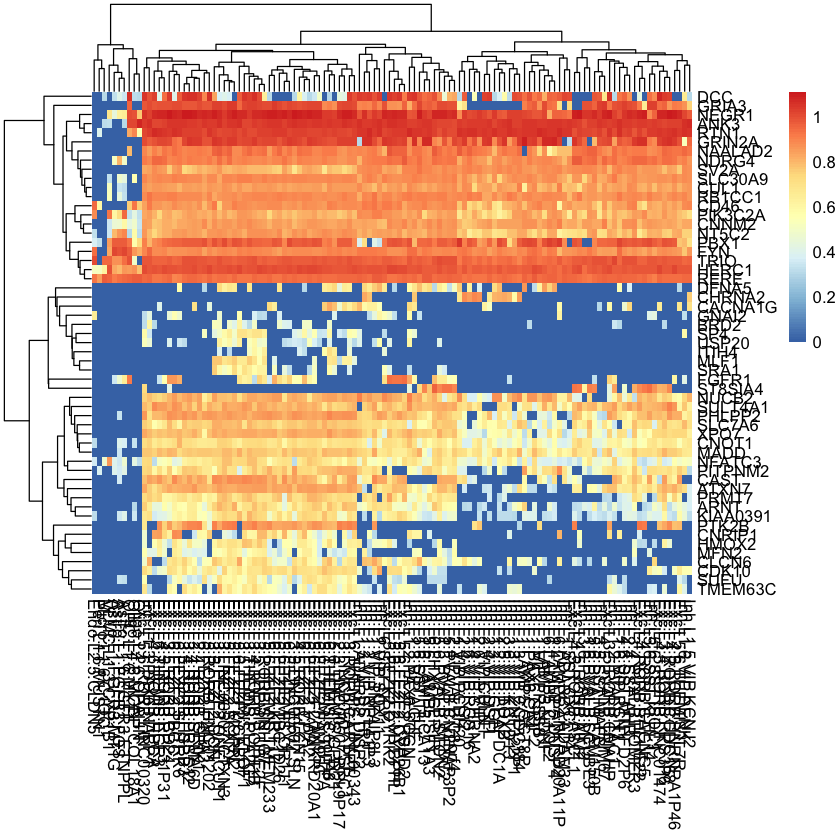

null device 
          1

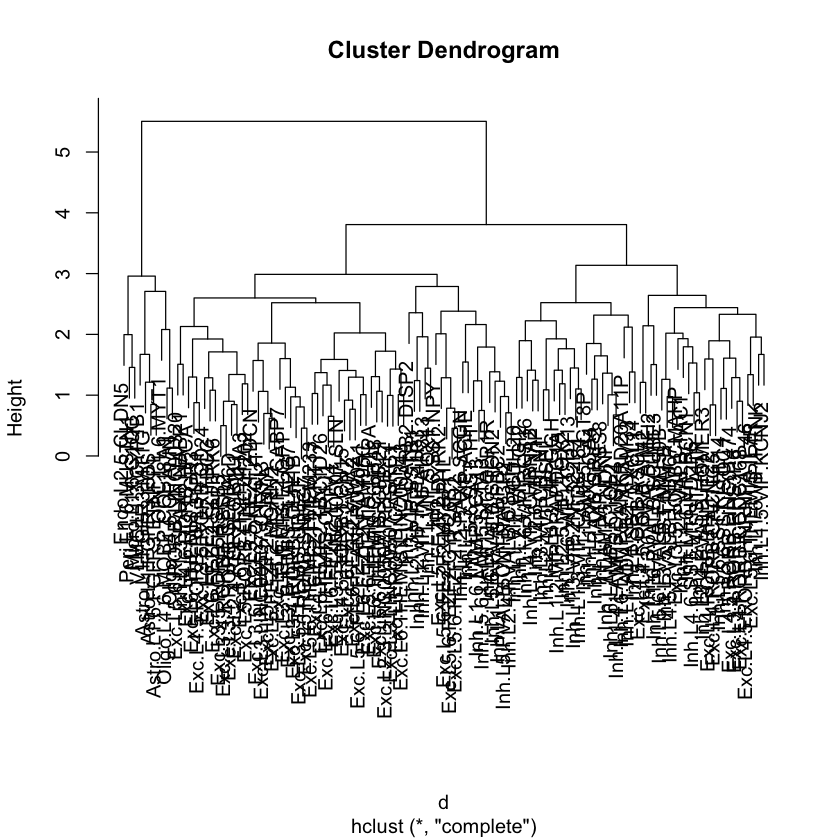

In [141]:
# select egenes from expr df interesting for 
geneset = interesting_egenes
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
region_gene_df_dz[region_gene_df_dz<=1] = 0
region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
p = pheatmap(region_gene_df_dz_log)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_vignette.pdf'),width=20,height=15)
par(bg='white')
plot(p$tree_col)
dev.off()

### analysis for bpd and scz today (supplemental of figure 3 eGene networks)


[1] 120  70

[1]  44 120

[1] 44  1

[1] 120   1

pdf 
  2

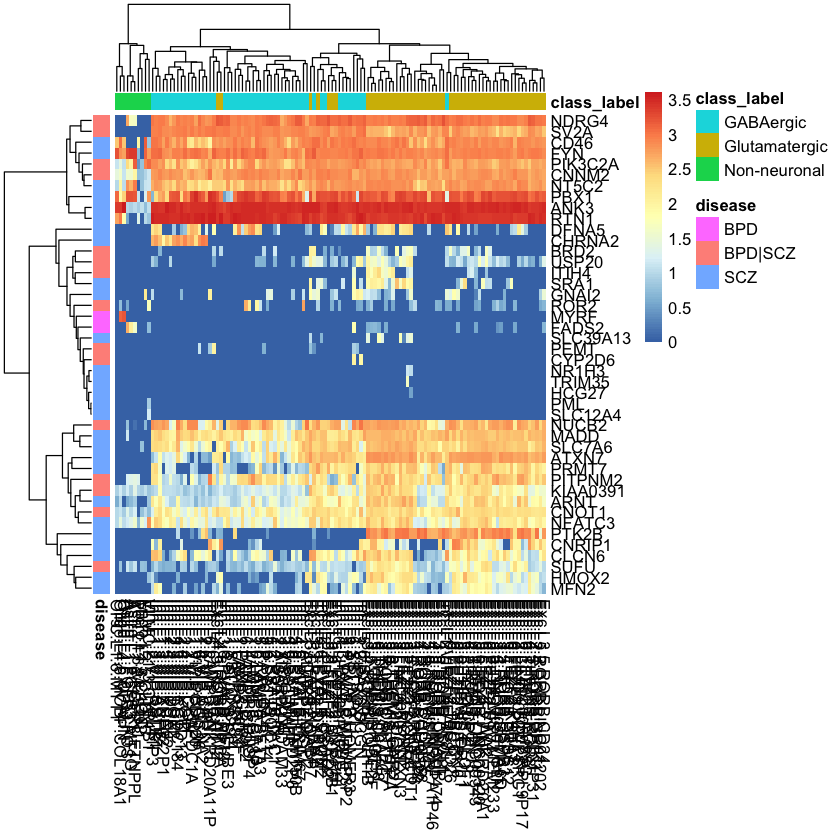

pdf 
  3

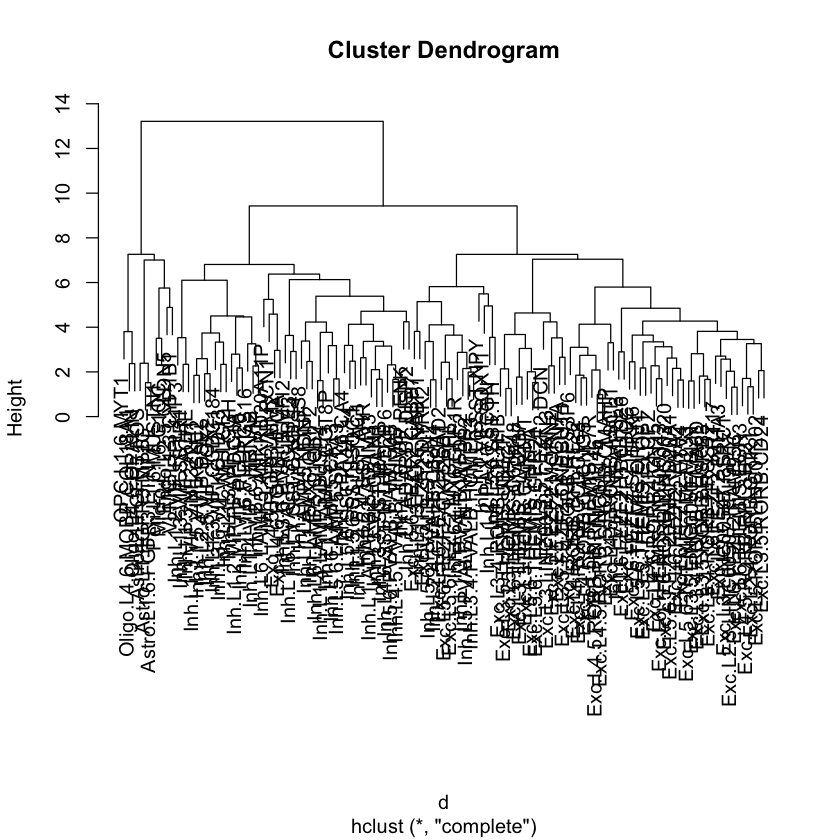

In [109]:
# select egenes from expr df schizo for 
bpd_geneset = intersect(dz_genes$bipolar, interesting_egenes)#unique(c(dz_genes$schizo,interesting_egenes))
scz_geneset = intersect(dz_genes$schizo, interesting_egenes)#unique(c(dz_genes$schizo,interesting_egenes))
geneset = union(bpd_geneset, scz_geneset)
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
# region_gene_df_dz[region_gene_df_dz<=5] = 0
# region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
region_gene_df_dz_log = region_gene_df_dz_log[rowSums(region_gene_df_dz_log)>.1,]
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
dim(region_gene_df_dz_log)
dz_annon = rbind(data.frame(gene = bpd_geneset, disease='BPD'), 
      data.frame(gene = scz_geneset, disease='SCZ'))
dz_annon = dz_annon = dz_annon%>%
    group_by(gene)%>%
    mutate(disease = as.character(paste0(disease, collapse = "|")))%>%
    distinct()%>%
    ungroup()%>%
    mutate(gene = as.character(gene))%>%
    filter(gene %in% rownames(region_gene_df_dz_log))%>%
    column_to_rownames('gene')
#     ungroup()%>%
dim(dz_annon)
cell_annon= metadata_df%>%
    dplyr::select(cluster_label, class_label)%>%
    mutate(cluster_label = str_replace_all(cluster_label, "[ .-]", "."))%>%
    distinct()%>%
    filter(class_label!='')%>%
    filter(cluster_label %in% colnames(region_gene_df_dz_log))%>%
    column_to_rownames('cluster_label')
dim(cell_annon)
p = pheatmap(region_gene_df_dz_log,
           annotation_row=dz_annon,
            annotation_col = cell_annon)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_bipolarschizo.pdf'),width=20,height=12)
par(bg='white')
plot(p$tree_col)
dev.off()

Saving 7 x 7 in image



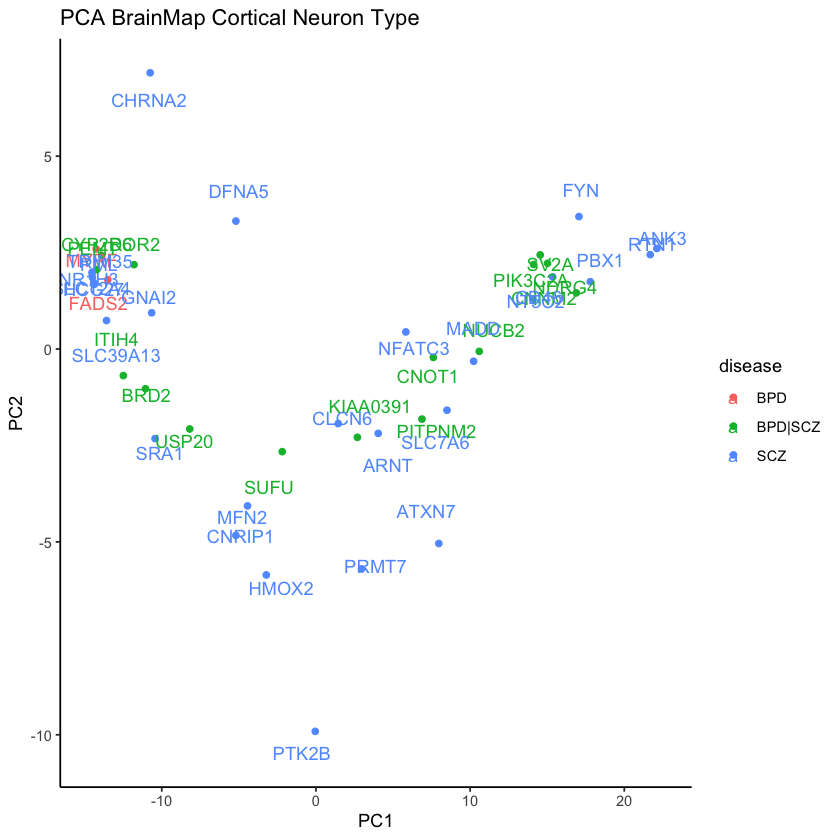

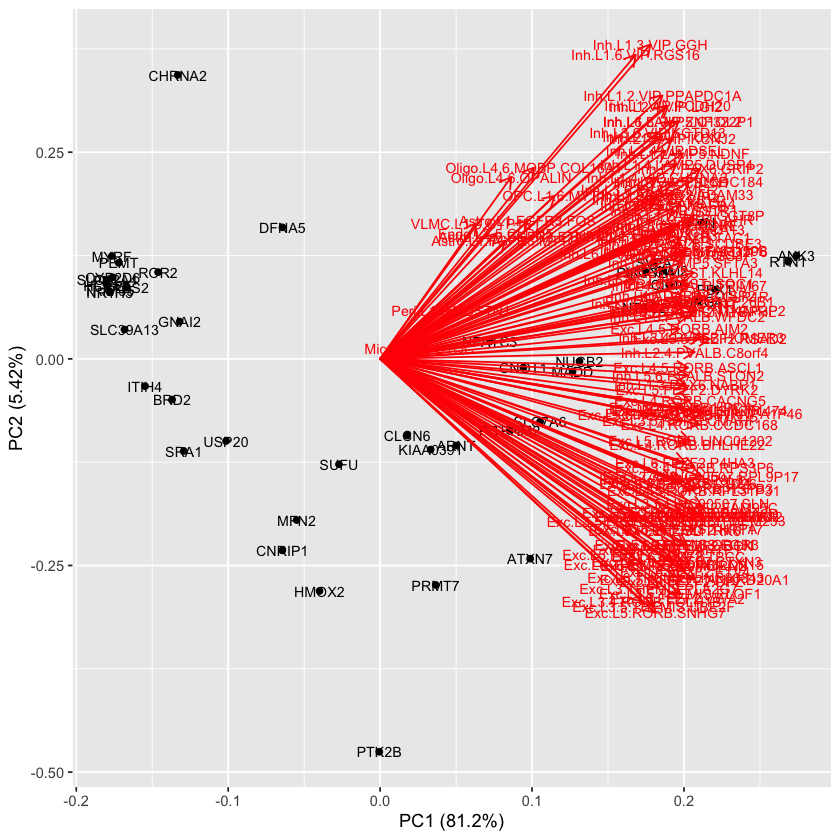

In [141]:
library(ggfortify)
library(cluster)

pca_res <- prcomp(region_gene_df_dz_log)
pca_res_df <- as.data.frame(pca_res$x)
pca_res_df = cbind(dz_annon,pca_res_df)
pca_res_df$gene = rownames(pca_res_df)
ggplot(pca_res_df, aes(x=PC1, y=PC2, label=gene,color=disease))+
    geom_point()+
geom_text(position=position_jitter(width=1,height=1))+
    theme_classic()+ggtitle('PCA BrainMap Cortical Neuron Type')
ggsave(paste0(save_path, 'pca_bipolarschizo.pdf'))
autoplot(pca_res, label=TRUE, label.size = 3,
         loadings = TRUE, loadings.label = TRUE, loadings.label.size  = 3)


In [68]:
mono_poly_genes = read.csv('/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/omim_enrichment/mono_poly_overlap_genelist.txt',
        stringsAsFactor=F, header=F)$V1
length(mono_poly_genes)

[1] 87

[1] 120  84

[1] "post expression filter per gene"


[1]  69 120

[1] "dz annon dimensions"


[1] 69  1

[1] "cell type annon dimensions"


[1] 120   1

pdf 
  2

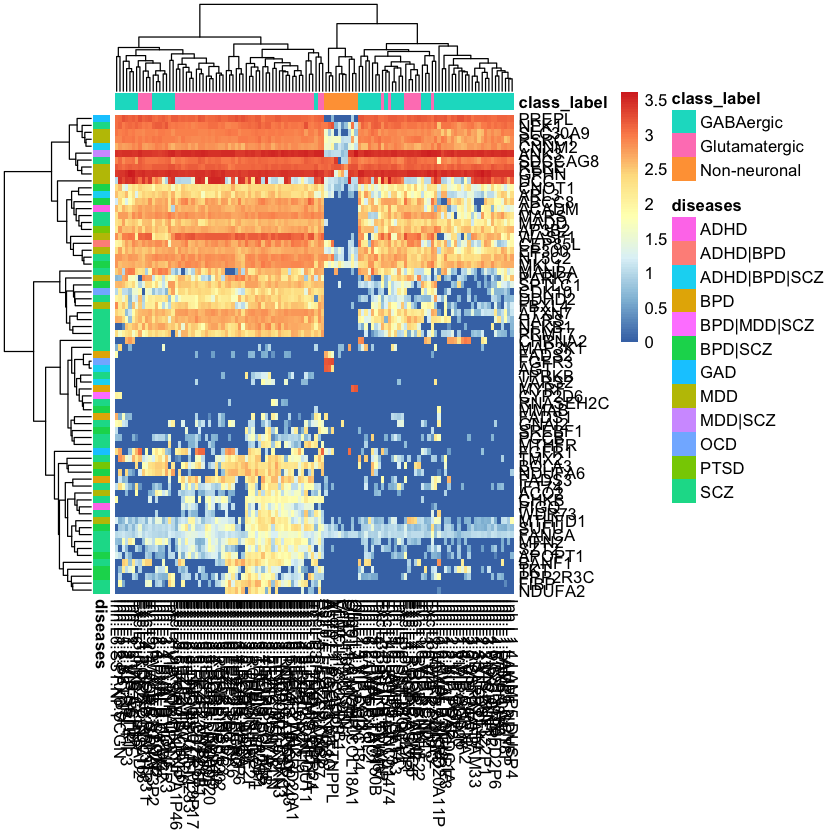

pdf 
  3

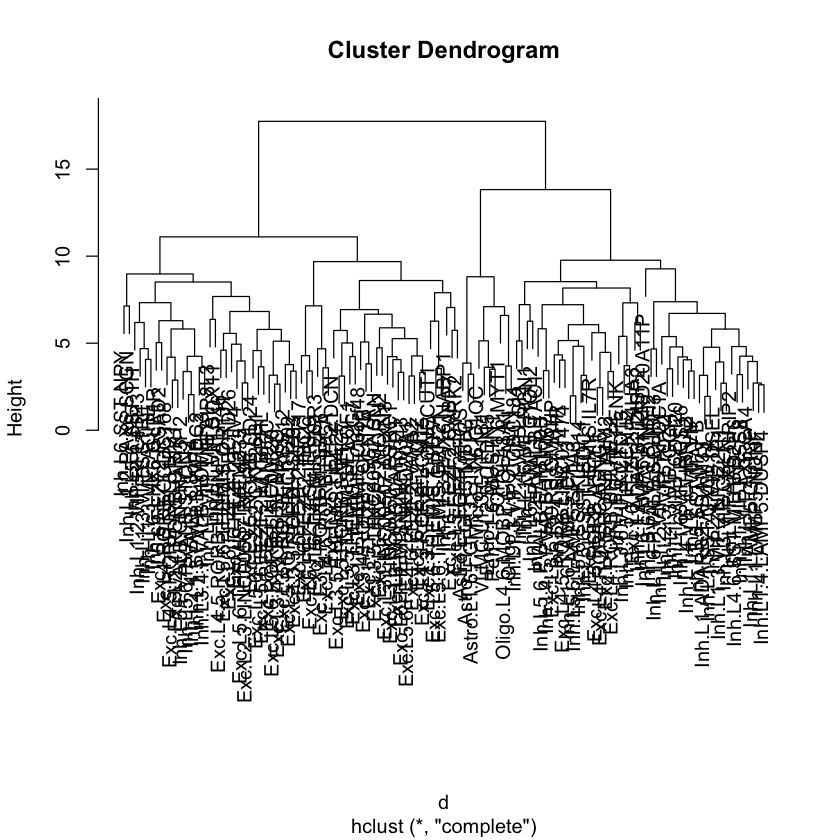

In [78]:
# select egenes and get expression matrix
geneset = mono_poly_genes
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
# region_gene_df_dz[region_gene_df_dz<=5] = 0
# region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
region_gene_df_dz_log = region_gene_df_dz_log[rowSums(region_gene_df_dz_log)>.1,]
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
print('post expression filter per gene')
dim(region_gene_df_dz_log)
dz_annon = read.csv('/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/D_mpraanalyze_barcode_allelic/egene_gtex/all_string_protein_annotations_w_dz.csv',
                     stringsAsFactor=F)
dz_annon = dz_annon%>%
    dplyr::select(X.node, diseases)%>%
    filter(X.node %in% rownames(region_gene_df_dz_log))%>%
    column_to_rownames('X.node')
print('dz annon dimensions')
dim(dz_annon)

cell_annon= metadata_df%>%
    dplyr::select(cluster_label, class_label)%>%
    mutate(cluster_label = str_replace_all(cluster_label, "[ .-]", "."))%>%
    distinct()%>%
    filter(class_label!='')%>%
    filter(cluster_label %in% colnames(region_gene_df_dz_log))%>%
    column_to_rownames('cluster_label')
print('cell type annon dimensions')
dim(cell_annon)
p = pheatmap(region_gene_df_dz_log,
           annotation_row=dz_annon,
            annotation_col = cell_annon)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_mono_poly.pdf'),width=20,height=12)
par(bg='white')
plot(p$tree_col)
dev.off()

In [103]:
library(ggfortify)
library(cluster)

pca_res <- prcomp(region_gene_df_dz_log)
pca_res_df <- as.data.frame(pca_res$x)
# autoplot(pca_res, label=TRUE, label.size = 3)#,
#          loadings = TRUE, loadings.label = TRUE, loadings.label.size  = 3)


In [108]:
dz_annon

diseases    
ABCC8    BPD|SCZ     
ACADM    ADHD        
ACO2     MDD         
AGT      ADHD|BPD|SCZ
ANK3     MDD|SCZ     
AP3B2    PTSD        
APOPT1   BPD|SCZ     
ARL3     ADHD|BPD|SCZ
ATXN7    SCZ         
BANF1    SCZ         
BOLA3    PTSD        
CDK10    OCD         
CEP85L   ADHD|BPD    
CHKB     SCZ         
CHRNA2   SCZ         
CNNM2    ADHD|BPD|SCZ
CNOT1    BPD|SCZ     
CYP2D6   BPD|MDD|SCZ 
DCC      MDD         
DDHD2    SCZ         
EP300    MDD         
FADS1    BPD         
FADS2    BPD         
FADS3    BPD         
FANCA    SCZ         
FBXL4    MDD         
FGFR1    GAD         
FGFR3    OCD         
FIBP     SCZ         
GNAI2    SCZ         
⋮        ⋮           
MMAB     BPD|SCZ     
MTHFD1   MDD         
MTHFR    SCZ         
MYRF     BPD         
NDUFA2   SCZ         
NDUFA6   BPD|SCZ     
NEK1     SCZ         
NFKB1    SCZ         
NT5C2    SCZ         
PARK7    MDD         
PCCB     SCZ         
PIGQ     ADHD        
PPP2R3C  BPD|SCZ     
PREPL    GAD         
PRMT7    SCZ         
RERE     MDD         
RNASEH2C SCZ         
RSRC1    MDD         
SDCCAG8  SCZ         
SLC30A9  MDD         
SPTLC1   BPD|SCZ     
SREBF1   BPD|SCZ     
SUFU     BPD|SCZ     
SZT2     SCZ         
TKT      BPD|SCZ     
TMX2     SCZ         
TPRKB    SCZ         
VARS2    ADHD|BPD|SCZ
WASF1    MDD         
WDR73    SCZ

In [104]:
cell_annon

class_label  
Inh.L2.5.VIP.TOX2          GABAergic    
Inh.L1.LAMP5.GGT8P         GABAergic    
Inh.L1.LAMP5.NDNF          GABAergic    
Inh.L1.3.VIP.ZNF322P1      GABAergic    
Inh.L3.VIP.CBLN1           GABAergic    
Inh.L1.4.LAMP5.DUSP4       GABAergic    
Exc.L2.3.LINC00507.RPL9P17 Glutamatergic
Inh.L1.SST.CXCL14          GABAergic    
Inh.L1.PAX6.GRIP2          GABAergic    
Inh.L1.2.VIP.PPAPDC1A      GABAergic    
Oligo.L4.6.OPALIN          Non-neuronal 
Inh.L1.PAX6.CA4            GABAergic    
Inh.L1.ADARB2.ADAM33       GABAergic    
Inh.L1.4.VIP.CHRNA2        GABAergic    
Astro.L1.6.FGFR3.ETNPPL    Non-neuronal 
Inh.L2.6.VIP.VIP           GABAergic    
Inh.L1.6.LAMP5.CA13        GABAergic    
Exc.L5.6.THEMIS.GPR21      Glutamatergic
Exc.L5.6.FEZF2.MYBPHL      Glutamatergic
Exc.L4.5.RORB.RPL31P31     Glutamatergic
Exc.L4.5.RORB.LCN15        Glutamatergic
Inh.L4.6.SST.MTHFD2P6      GABAergic    
Exc.L6.THEMIS.LINC00343    Glutamatergic
Exc.L6.FEZF2.FAM95C        Glutamatergic
Exc.L4.5.RORB.LINC01474    Glutamatergic
OPC.L1.6.MYT1              Non-neuronal 
Inh.L5.6.PVALB.FAM150B     GABAergic    
Exc.L6.FEZF2.KRT17         Glutamatergic
Inh.L5.PVALB.CNTNAP3P2     GABAergic    
Inh.L5.6.LAMP5.SFTA3       GABAergic    
⋮                          ⋮            
Exc.L2.4.RORB.GRIK1        Glutamatergic
Inh.L1.6.VIP.PENK          GABAergic    
Inh.L1.2.PVALB.TAC1        GABAergic    
Inh.L1.3.PAX6.NABP1        GABAergic    
Inh.L1.3.VIP.CCDC184       GABAergic    
Inh.L1.6.VIP.RCN1          GABAergic    
Exc.L3.5.FEZF2.ONECUT1     Glutamatergic
Exc.L6.FEZF2.TBCC          Glutamatergic
Exc.L3.5.RORB.CD24         Glutamatergic
VLMC.L1.3.CYP1B1           Non-neuronal 
Exc.L5.6.THEMIS.IL7R       Glutamatergic
Exc.L4.RORB.BHLHE22        Glutamatergic
Exc.L4.RORB.CACNG5         Glutamatergic
Exc.L4.5.RORB.AIM2         Glutamatergic
Exc.L4.6.RORB.HPCA         Glutamatergic
Exc.L6.THEMIS.EGR3         Glutamatergic
Exc.L6.FEZF2.VWA2          Glutamatergic
Inh.L4.5.PVALB.TRIM67      GABAergic    
Exc.L4.5.RORB.ASCL1        Glutamatergic
Exc.L5.6.FEZF2.RSAD2       Glutamatergic
Exc.L3.LINC00507.PSRC1     Glutamatergic
Exc.L3.4.RORB.RPS3P6       Glutamatergic
Exc.L5.FEZF2.MORN2         Glutamatergic
Exc.L3.5.LINC00507.SLN     Glutamatergic
Exc.L3.5.THEMIS.UBE2F      Glutamatergic
Exc.L3.5.FEZF2.DCN         Glutamatergic
Exc.L4.RORB.CCDC168        Glutamatergic
Exc.L3.LINC00507.CTXN3     Glutamatergic
Exc.L3.THEMIS.PLA2G7       Glutamatergic
Exc.L5.FEZF2.DYRK2         Glutamatergic

In [90]:
# get expressed cell types
write.table(data.frame(sort(rownames(region_gene_df_dz_log))),
            '/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/omim_enrichment/mono_poly_overlap_genelist_scrna_filt.txt',
            quote=F, col.names=F, row.names=F)

In [ ]:
1za

In [ ]:
# select egenes from expr df interesting for 
geneset = c('MTHFR', 'AKT1', 'C4A', 'CHRNA2')
region_gene_df_dz = brainmap_expr_df_region[,geneset[geneset%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
region_gene_df_dz[region_gene_df_dz<=1] = 0
region_gene_df_dz = remove_lowvar_genes(region_gene_df_dz)
region_gene_df_dz_log = log2(t(region_gene_df_dz)+1)
# region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))
p = pheatmap(region_gene_df_dz_log)
save_pheatmap_pdf(p,paste0(save_path, 'region_gene_df_omim.pdf'),width=20,height=15)
par(bg='white')
plot(p$tree_col)
dev.off()

In [ ]:
# select egenes from expr df
region_gene_df_dz = brainmap_expr_df_region[,dz_genes$schizo[dz_genes$schizo%in%colnames(brainmap_expr_df_region)]]
dim(region_gene_df_dz)
region_gene_df_dz[region_gene_df_dz<=5] = 0
region_gene_df_dz_log = log10(t(remove_lowvar_genes(region_gene_df_dz))+1)
region_gene_df_dz_log_norm = as.data.frame(scale(region_gene_df_dz_log, center = TRUE, scale = TRUE))

pheatmap(region_gene_df_dz_log_norm)

In [73]:
# make gmt object
region_gene_df_long_filt = region_gene_df%>%
    rownames_to_column('region')%>%
    gather(gene,tpm, -region)%>%
    filter(tpm>5)%>%
    inner_join(all_sym_to_entrez, by=c('gene'='SYMBOL'))
# region_gene_df_long_annon = region_gene_df_long_filt%>%
#     column_to_rownames('gene')%>%
dim(region_gene_df_long_filt)
str(region_gene_df_long_filt)

[1] 721   4

'data.frame':	721 obs. of  4 variables:
 $ region  : chr  "A1C" "M1lm" "M1ul" "MTG" ...
 $ gene    : chr  "ABCB9" "ABCB9" "ABCB9" "ABCB9" ...
 $ tpm     : num  8 8 11 17 9 7 11 20 32 22 ...
 $ ENTREZID: chr  "23457" "23457" "23457" "23457" ...


In [74]:
region_gene_gmt = region_gene_df_long_filt%>%
    mutate(region = as.factor(region))%>%
    dplyr::select(region, ENTREZID)
str(region_gene_gmt)

'data.frame':	721 obs. of  2 variables:
 $ region  : Factor w/ 8 levels "A1C","CgG","M1lm",..: 1 3 4 5 6 7 8 1 2 3 ...
 $ ENTREZID: chr  "23457" "23457" "23457" "23457" ...


# run enrichments

In [75]:
# compareCluster(geneCluster = dz_gene_list_entrez, fun = "enrichGO", 
#                                 pAdjustMethod='BH', 
#                                 pvalueCutoff  = 1,
#                                 qvalueCutoff  = 1,
#                                 OrgDb='org.Hs.eg.db', 
#                                 ont = "BP",
#                                 readable=TRUE)

In [76]:
dz_egene_scRNAregion = run_enrichment(entrez_list=dz_gene_list_entrez,
                          c_gmt = region_gene_gmt,
                          save_prefix=paste0(save_path, 'dz_egene_scRNAregion'))


--> No gene can be mapped....

--> Expected input gene ID: 9527,146691,84940,6733,54805,2185

--> return NULL...

--> No gene can be mapped....

--> Expected input gene ID: 23035,2023,54664,23248,11237,2185

--> return NULL...



[1] "anxiety"
[1] 0
[1] "attent"
[1] 0
[1] "autism"
[1] 0
[1] "bipolar"
[1] 0
[1] "depress"
[1] 0
[1] "ocd"
[1] 0
[1] "panic"
[1] 0
[1] "personality"
[1] 0
[1] "schizo"
[1] 0
[1] "traum"
[1] 0
[1] "all"
[1] 0
[1] "getting unique genes --all"
  [1] "ABCB9"    "ABCC8"    "ACADM"    "ALMS1"    "ANK3"     "AP3B2"   
  [7] "ARL3"     "ARL6IP4"  "ARNT"     "ASAP1"    "ATP6V1D"  "ATXN7"   
 [13] "BAG4"     "BOLA3"    "CAST"     "CCDC25"   "CD46"     "CDIP1"   
 [19] "CDK10"    "CEP170"   "CEP85L"   "CKAP5"    "CKB"      "CNNM2"   
 [25] "CNOT1"    "CORO6"    "DCC"      "DCP1A"    "DDHD2"    "DDX27"   
 [31] "ENO1"     "EP300"    "ERAP1"    "EVI5"     "FADS3"    "FBXL16"  
 [37] "FBXL20"   "FBXL4"    "FLOT1"    "FYN"      "GFM1"     "GLT8D1"  
 [43] "GOSR1"    "GPHN"     "HCG18"    "IK"       "IMMP2L"   "JKAMP"   
 [49] "KLC1"     "MADD"     "MAN2A1"   "MANBA"    "MPHOSPH9" "MPP6"    
 [55] "NAALAD2"  "NCR3LG1"  "NDRG4"    "NEGR1"    "NEK1"     "NEK4"    
 [61] "NFATC3"   "NFKB1"    "NSRP1"   

No enrichment so just make an annotation in the big table

# make annotation table

In [79]:
region_gene_df_long_filt%>%
    group_by(gene)%>%tally()%>%arrange(desc(n))

gene     n
1   ABCC8    8
2   ACADM    8
3   ALMS1    8
4   ANK3     8
5   AP3B2    8
6   ASAP1    8
7   ATXN7    8
8   CAST     8
9   CD46     8
10  CEP170   8
11  CEP85L   8
12  CKAP5    8
13  CKB      8
14  CNNM2    8
15  CORO6    8
16  DCP1A    8
17  ENO1     8
18  EP300    8
19  ERAP1    8
20  EVI5     8
21  FBXL20   8
22  FLOT1    8
23  FYN      8
24  GPHN     8
25  IMMP2L   8
26  KLC1     8
27  MADD     8
28  MAN2A1   8
29  MPHOSPH9 8
30  MPP6     8
⋮   ⋮        ⋮
80  ATP6V1D  6
81  CCDC25   6
82  FBXL16   6
83  NFATC3   6
84  PRMT7    6
85  RANGAP1  6
86  CNOT1    5
87  DDX27    5
88  NCR3LG1  5
89  PDCD11   5
90  RAB40C   5
91  JKAMP    4
92  SPTLC1   4
93  FBXL4    3
94  GLT8D1   3
95  IK       3
96  NSRP1    3
97  PARK7    3
98  TAPBP    3
99  ARNT     2
100 BAG4     2
101 CDK10    2
102 FADS3    2
103 MANBA    2
104 BOLA3    1
105 CDIP1    1
106 DDHD2    1
107 NEK4     1
108 SNX19    1
109 YJEFN3   1